# Trabajo Tesis: Preprocesamiento

### Librerias y bases

In [64]:
import numpy as np
import pandas as pd
import os
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm


In [65]:
os.chdir('c:/Users/artur/OneDrive/Documents/TrabajoTesis') 
#os.chdir('C:/Users/admin/OneDrive/Documents/TrabajoTesis')

In [66]:
df = pd.read_excel('Cluster/Faenas25.xlsx')

In [67]:
# Limpiar nombres de columnas
df.columns = ['RutEmpresa' if col == 'RutEmpresa' else col.lstrip() for col in df.columns]

# Limpiar espacios dentro de las columnas (excepto RutEmpresa)
for col in df.select_dtypes(include='object').columns:
    if col != 'RutEmpresa':
        df[col] = df[col].str.strip()


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28319 entries, 0 to 28318
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RutEmpresa                  28319 non-null  object 
 1   NombreEmpresa               28319 non-null  object 
 2   RegionFaena                 28319 non-null  object 
 3   ProvinciaFaena              28319 non-null  object 
 4   ComunaFaena                 28319 non-null  object 
 5   NombreFaena                 28318 non-null  object 
 6   CategoriaFaena              28319 non-null  object 
 7   IdFaena                     28319 non-null  int64  
 8   RegionInstalacion           28319 non-null  object 
 9   ProvinciaInstalacion        28319 non-null  object 
 10  ComunaInstalacion           28319 non-null  object 
 11  NombreInstalacion           28319 non-null  object 
 12  IdTipoInstalacion           28319 non-null  int64  
 13  TipoInstalacion             283

### EDA preliminar

In [69]:
print(df['TipoInstalacion'].unique())


['TALLERES Y MAESTRANZA' 'EXPLORACION DE SUPERFICIE' 'MINA SUBTERRANEA'
 'MINA RAJO ABIERTO' 'DEPÓSITO RMM - ESTÉRILES' 'BODEGA' 'CAMPAMENTO'
 'POLVORIN' 'ADMINISTRACIÓN - OFICINA' 'PLANTA CHANCADO'
 'DEPÓSITO RMM - MINERAL DE BAJA LEY' 'LIXIVIACION' 'PLANTA CONCENTRADORA'
 'SUB-ESTACION ELECTRICA' 'DEPÓSITO - TRANQUE DE RELAVES'
 'CANCHA DE ACOPIO' 'MUESTRERA Y/O LABORATORIO' 'PUERTO DE EMBARQUE'
 'PLANTA DIMENSIONAMIENTO Y CORTE' 'PLANTA MOLIENDA' 'PLANTA ESPESADORES'
 'PLANTA FILTRO' 'PILAS DE FLOTACION' 'DEPÓSITO - FILTRADOS'
 'PLANTA EXTRACCIÓN POR SOLVENTES' 'PISCINAS DE EMERGENCIA'
 'ESTACION DE COMPRESORES' 'ESPESADORES' 'MINERODUCTO'
 'ESTACION DE BOMBEO' 'FUNDICION' 'CASA DE FUERZA' 'SALA DE CONTROL'
 'PLANTA DE CONVERSION' 'PLANTA DE ACIDO' 'CORREA TRANSPORTADORA'
 'CENTRAL - GAS' 'BATERIA DE RECEPCIÓN - PETRÓLEO' 'CALENTADOR - PETRÓLEO'
 'POZO DE PETROLEO' 'DEPÓSITO - EMBALSES'
 'TRAMPAS DE RECEPCIÓN/LANZAMIENTO HC' 'POZO DE GAS'
 'PLANTA QUÍMICA DE CONVERSIÓN' 'POZOS DE EX

In [70]:
from IPython.display import display, HTML

# Crear un DataFrame con nombres de columnas claros
df_counts = (
    df['TipoInstalacion']
    .value_counts()
    .rename_axis('TipoInstalacion')
    .reset_index(name='count')
)

# Mostrar como HTML desplazable
html = (
    "<div style='height:300px; overflow:auto;'>"
    + df_counts.to_html(index=False)
    + "</div>"
)
display(HTML(html))


TipoInstalacion,count
MINA SUBTERRANEA,9100
MINA RAJO ABIERTO,3716
DEPÓSITO RMM - ESTÉRILES,2884
CAMPAMENTO,1766
EXPLORACION DE SUPERFICIE,1659
POLVORIN,1595
DEPÓSITO RMM - MINERAL DE BAJA LEY,736
PLANTA CONCENTRADORA,672
TALLERES Y MAESTRANZA,644
DEPÓSITO - TRANQUE DE RELAVES,592


In [71]:
df['Estado'].value_counts()

Estado
ACTIVA                                 10834
ABANDONADA                             10134
IRREGULAR OPERATIVA                     2204
INACTIVA                                1508
EN REVISIÓN DE PROYECTO                 1358
EXPLORACIÓN FINALIZADA                   715
CIERRE FINAL                             577
PROYECTADA                               375
CIERRE TEMPORAL                          331
PARALIZADA POR SANCION                   242
PARALIZACIÓN POR MEDIDA PROVISIONAL       41
Name: count, dtype: int64

CategoriaFaena,count
CATEGORIA D,20100
CATEGORIA C,3601
CATEGORIA A,2941
CATEGORIA B,849
SIN CATEGORIA,828


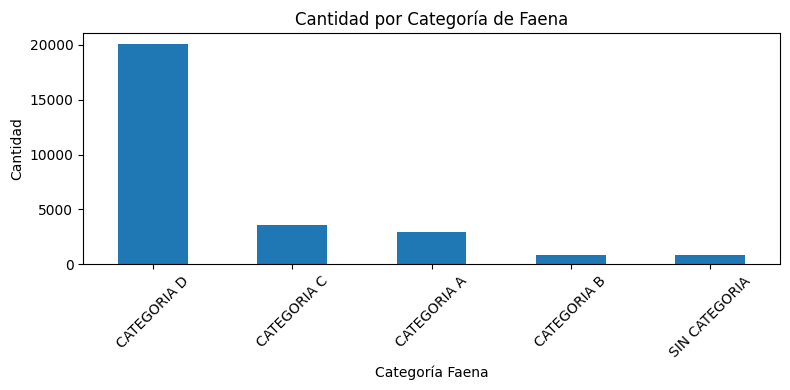

In [72]:
from IPython.display import display, HTML

df_cat = (
    df['CategoriaFaena']
    .value_counts()
    .rename_axis('CategoriaFaena')
    .reset_index(name='count')
)

html = (
    "<div style='max-height:300px; overflow-y:auto; font-family:Arial; font-size:14px;'>"
    + df_cat.to_html(index=False, border=0)
    + "</div>"
)

display(HTML(html))

# Gráfico de barras
import matplotlib.pyplot as plt

df_cat.plot(x='CategoriaFaena', y='count', kind='bar', legend=False, figsize=(8,4))
plt.xlabel('Categoría Faena')
plt.ylabel('Cantidad')
plt.title('Cantidad por Categoría de Faena')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [73]:
import pandas as pd

# Table of NaN counts per column
nan_counts = df.isna().sum().to_frame(name='NaN_count')
display(nan_counts)

,NaN_count
RutEmpresa,0
NombreEmpresa,0
RegionFaena,0
ProvinciaFaena,0
ComunaFaena,0
NombreFaena,1
CategoriaFaena,0
IdFaena,0
RegionInstalacion,0
ProvinciaInstalacion,0


,RegionInstalacion,CantidadFaenas
0,ATACAMA,8113
1,COQUIMBO,7725
2,ANTOFAGASTA,4035
3,VALPARAISO,3934
4,METROPOLITANA DE SANTIAGO,1237
5,MAGALLANES Y DE LA ANTARTICA CHILENA,954
6,LIBERTADOR GENERAL BERNARDO OHIGGINS,681
7,TARAPACA,625
8,ARICA Y PARINACOTA,421
9,BIOBIO,342


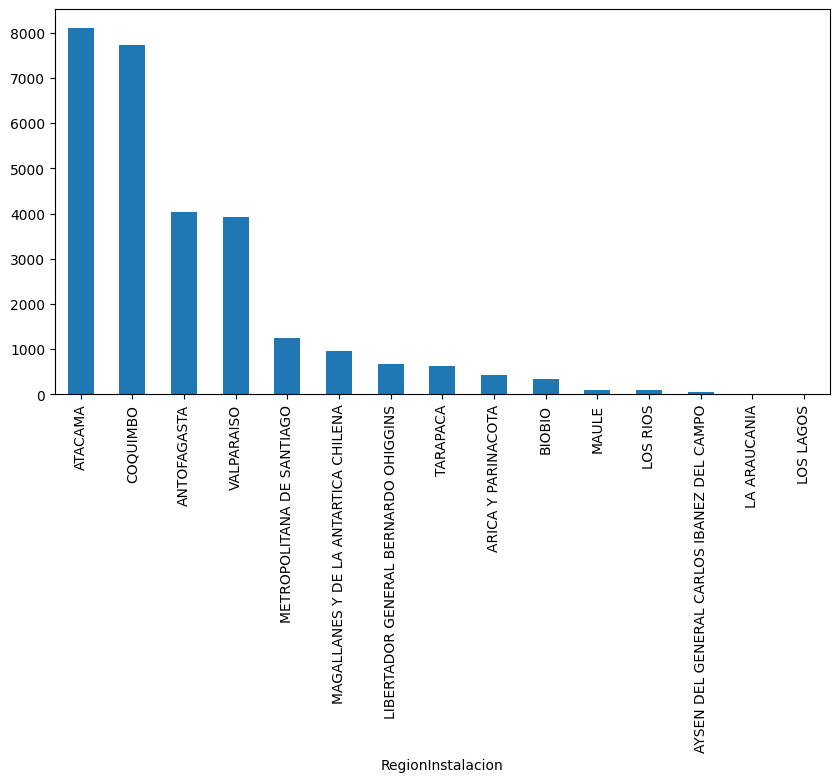

In [74]:
region_counts = (
    df['RegionInstalacion']
    .value_counts()
    .rename_axis('RegionInstalacion')
    .reset_index(name='CantidadFaenas')
)
region_counts.plot(x='RegionInstalacion', y='CantidadFaenas', kind='bar', figsize=(10,5), legend=False)
display(region_counts.head(10))


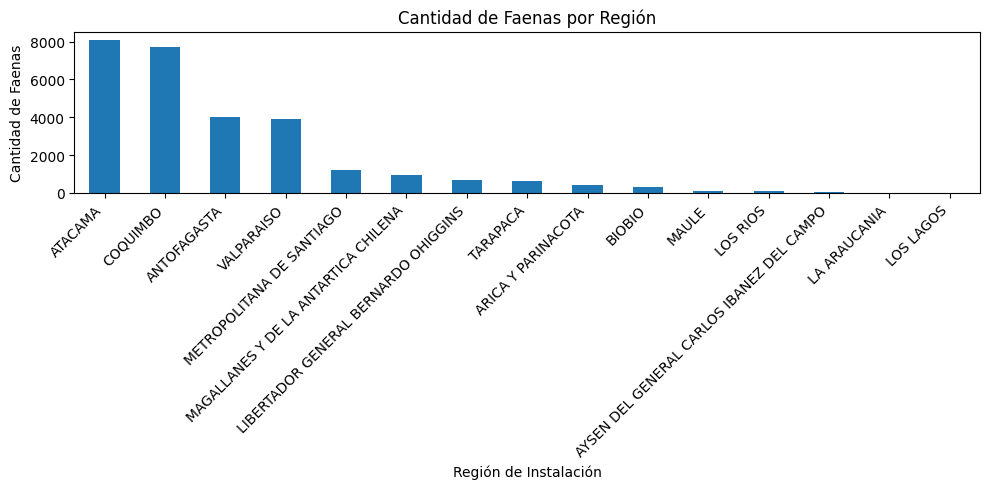

In [75]:
region_counts.plot(x='RegionInstalacion', y='CantidadFaenas', kind='bar', figsize=(10,5), legend=False)
import matplotlib.pyplot as plt

plt.xlabel('Región de Instalación')
plt.ylabel('Cantidad de Faenas')
plt.title('Cantidad de Faenas por Región')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [76]:
top_empresas = (
    df['NombreEmpresa']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'NombreEmpresa', 'NombreEmpresa': 'CantidadFaenas'})
)

html = (
    "<div style='max-height:300px; overflow-y:auto; font-family:Arial; font-size:14px;'>"
    + top_empresas.to_html(index=False, border=0)
    + "</div>"
)
display(HTML(html))

CantidadFaenas,count
Empresa Nacional del Petróleo,692
CORPORACION NACIONAL DEL COBRE (CODELCO),509
ANGLO AMERICAN SUR S.A.,387
EMPRESA NACIONAL DE MINERIA (ENAMI),336
FMA/P,193
CIA. MRA. DEL PACIFICO S.A.,180
MINERA LAS CENIZAS S.A.,173
JUAN AUGUSTO MUNIZAGA ROMAN,173
MINERA FLORIDA LTDA.,152
GREGORIO ENERGY FELL SPA,135


In [77]:
df['RecursoPrimarioInstalacion']

0           COBRE
1           COBRE
2           COBRE
3          HIERRO
4           COBRE
           ...   
28314       COBRE
28315    SILICEOS
28316    SILICEOS
28317       COBRE
28318         ORO
Name: RecursoPrimarioInstalacion, Length: 28319, dtype: object

### Limpieza

In [78]:
df = df[df['RecursoPrimarioInstalacion'] == 'COBRE']
df.shape

(21158, 27)

In [79]:
df

,RutEmpresa,NombreEmpresa,RegionFaena,ProvinciaFaena,ComunaFaena,NombreFaena,CategoriaFaena,IdFaena,RegionInstalacion,ProvinciaInstalacion,...,IdInstalacion,Norte,Este,Cota,Huso,Datum,IdEstado,Estado,Latitud,Longitud
0,61703000-4,EMPRESA NACIONAL DE MINERIA (ENAMI),III,HUASCO,VALLENAR,PLANTA DE BENEFICIO DE MINERALES - VALLENAR,CATEGORIA B,153576,ATACAMA,HUASCO,...,2000016078,6839116.0,330003.0,538,19,PSAD-56,8,ACTIVA,-28.566725,-70.740064
1,76125921-0,CUPRUM RESOURCES CHILE SPA,IV,ELQUI,LA HIGUERA,LA VERDE,CATEGORIA D,20012162,COQUIMBO,ELQUI,...,2000016187,6743203.0,336885.0,1200,19,PSAD-56,169,INACTIVA,-29.432920,-70.683699
2,76362163-4,MINERA RUPERTO PATRICIO ORTIZ PALOMINOS,VI,COLCHAGUA,LOLOL,MINA LA VENUS,CATEGORIA D,20013211,LIBERTADOR GENERAL BERNARDO OHIGGINS,COLCHAGUA,...,2000017211,6160230.0,271326.0,134,19,PSAD-56,12,ABANDONADA,-34.677189,-71.498091
4,6891906-1,GARY NELSON MERCADO MALBRAN,III,CHAÑARAL,CHAÑARAL,DIEGO DAKAR 1/10,CATEGORIA D,20013237,ATACAMA,CHAÑARAL,...,2000018057,7078335.0,359170.0,531,19,PSAD-56,8,ACTIVA,-26.411292,-70.414104
12,76448510-6,SLM CASUALIDAD PRIMERA DE EL MANZANO,IV,ELQUI,ANDACOLLO,CASUALIDAD UNO,CATEGORIA D,20015093,COQUIMBO,ELQUI,...,2000019076,6657100.0,299764.0,917,19,PSAD-56,2169,IRREGULAR OPERATIVA,-30.204069,-71.082232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28311,78131832-9,BALFENI SOLUTIONS SPA,IV,CHOAPA,CANELA,FAENA DON MARIO,CATEGORIA D,20389551,COQUIMBO,CHOAPA,...,2000557972,6544556.0,284169.0,1277,19,PSAD-56,5170,EN REVISIÓN DE PROYECTO,-31.216132,-71.267759
28312,78131832-9,BALFENI SOLUTIONS SPA,IV,CHOAPA,CANELA,FAENA DON MARIO,CATEGORIA D,20389551,COQUIMBO,CHOAPA,...,2000557973,6544044.0,284421.0,1199,19,PSAD-56,5170,EN REVISIÓN DE PROYECTO,-31.220795,-71.265226
28313,6188182-4,EDILIO GOMEZ OYARZUN,IV,CHOAPA,CANELA,LA ROSARIO 1 AL 20,CATEGORIA D,20346577,COQUIMBO,CHOAPA,...,2000551067,6507500.0,277700.0,458,19,PSAD-56,5170,EN REVISIÓN DE PROYECTO,-31.548972,-71.343902
28314,78110627-5,C & C MINERIA SpA,II,EL LOA,CALAMA,LA DESPRECIADA IV 1 AL 1O,CATEGORIA D,20388642,ANTOFAGASTA,EL LOA,...,2000554937,7451789.0,545590.0,3250,19,PSAD-56,5170,EN REVISIÓN DE PROYECTO,-23.044930,-68.557016


In [80]:
df = df.drop(columns=[
    'RegionFaena', 'ProvinciaFaena', 'ComunaFaena', 'NombreFaena', 'IdFaena',
    'RegionInstalacion', 'NombreInstalacion', 'RecursoMineroInstalacion',
    'TipoRecursoInstalacion', 'IdInstalacion', 'Norte', 'Este', 'Datum'
])

## Modelo solo con latitud y longitud

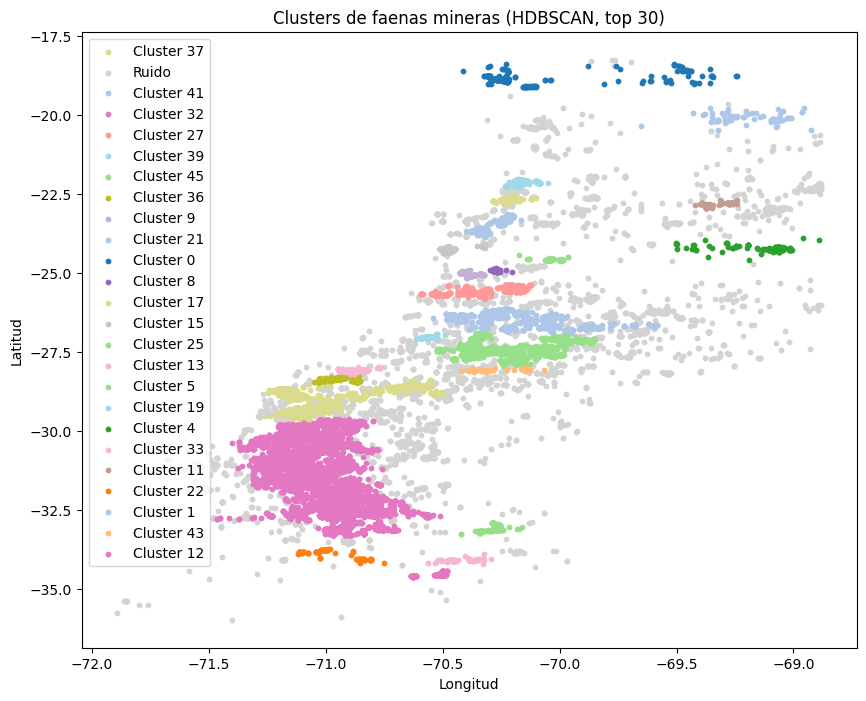

In [113]:
import hdbscan
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Remove outliers using z-score ===
coords = df[['Longitud', 'Latitud']].to_numpy()
z_scores = np.abs((coords - coords.mean(axis=0)) / coords.std(axis=0))
mask = (z_scores[:,0] < 3) & (z_scores[:,1] < 3)  # keep points within 3 std dev
df_clean = df[mask].copy()
coords_clean = df_clean[['Longitud', 'Latitud']].to_numpy()

# === Step 2: Fit HDBSCAN on cleaned data ===
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=30,       
    cluster_selection_epsilon=0.08
)
df_clean['cluster'] = clusterer.fit_predict(coords_clean)

# === Step 3: Keep only top 30 largest clusters ===
cluster_counts = df_clean['cluster'].value_counts()
top_clusters = cluster_counts.nlargest(25).index
df_clean['cluster'] = df_clean['cluster'].apply(lambda x: x if x in top_clusters else -1)

# === Step 4: Plot ===
plt.figure(figsize=(10,8))
cmap = plt.get_cmap('tab20')

clusters = df_clean['cluster'].unique()
for cluster in clusters:
    mask = df_clean['cluster'] == cluster
    if cluster == -1:
        plt.scatter(df_clean.loc[mask, 'Longitud'], df_clean.loc[mask, 'Latitud'],
                    color='lightgray', s=10, label='Ruido')
    else:
        plt.scatter(df_clean.loc[mask, 'Longitud'], df_clean.loc[mask, 'Latitud'],
                    color=cmap(cluster % 20), s=10, label=f'Cluster {cluster}')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clusters de faenas mineras (HDBSCAN, top 30)')
plt.legend()
plt.show()


In [114]:
df = df[df['Estado'] == 'ACTIVA']

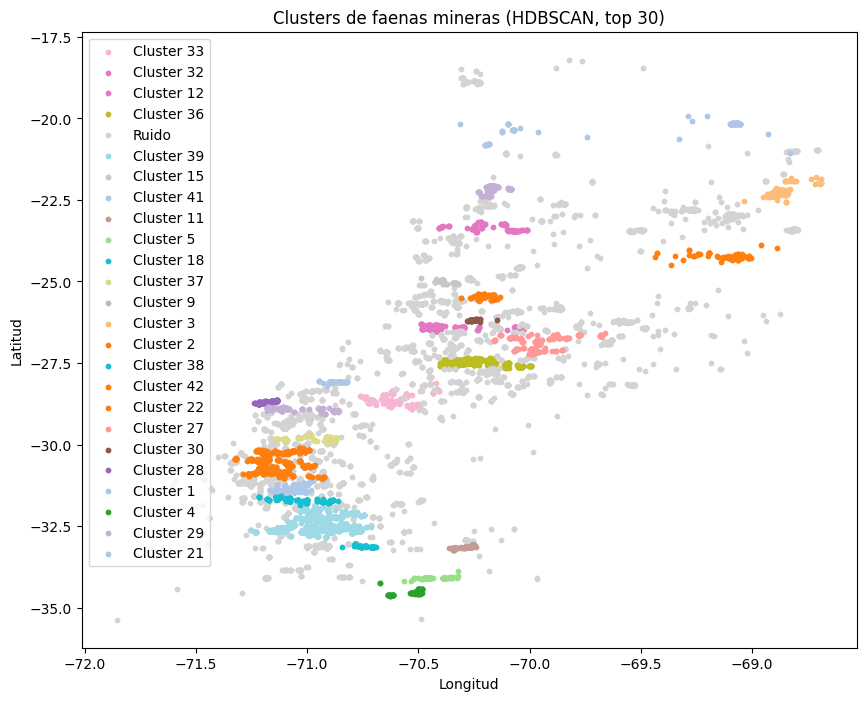

In [115]:
import hdbscan
import matplotlib.pyplot as plt
import numpy as np

# === Step 1: Remove outliers using z-score ===
coords = df[['Longitud', 'Latitud']].to_numpy()
z_scores = np.abs((coords - coords.mean(axis=0)) / coords.std(axis=0))
mask = (z_scores[:,0] < 3) & (z_scores[:,1] < 3)  # keep points within 3 std dev
df_clean = df[mask].copy()
coords_clean = df_clean[['Longitud', 'Latitud']].to_numpy()

# === Step 2: Fit HDBSCAN on cleaned data ===
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=30,       
    cluster_selection_epsilon=0.08
)
df_clean['cluster'] = clusterer.fit_predict(coords_clean)

# === Step 3: Keep only top 30 largest clusters ===
cluster_counts = df_clean['cluster'].value_counts()
top_clusters = cluster_counts.nlargest(25).index
df_clean['cluster'] = df_clean['cluster'].apply(lambda x: x if x in top_clusters else -1)

# === Step 4: Plot ===
plt.figure(figsize=(10,8))
cmap = plt.get_cmap('tab20')

clusters = df_clean['cluster'].unique()
for cluster in clusters:
    mask = df_clean['cluster'] == cluster
    if cluster == -1:
        plt.scatter(df_clean.loc[mask, 'Longitud'], df_clean.loc[mask, 'Latitud'],
                    color='lightgray', s=10, label='Ruido')
    else:
        plt.scatter(df_clean.loc[mask, 'Longitud'], df_clean.loc[mask, 'Latitud'],
                    color=cmap(cluster % 20), s=10, label=f'Cluster {cluster}')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clusters de faenas mineras (HDBSCAN, top 30)')
plt.legend()
plt.show()

In [94]:
cols_keep = ['Latitud', 'Longitud', 'Cota']
df_dbscan = df[cols_keep].dropna()


In [95]:
from sklearn.preprocessing import StandardScaler

X = df_dbscan[['Latitud', 'Longitud', 'Cota']]  # o solo ['Latitud', 'Longitud']
X_scaled = StandardScaler().fit_transform(X)


In [96]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=20)
labels = db.fit_predict(X_scaled)

df['cluster'] = labels


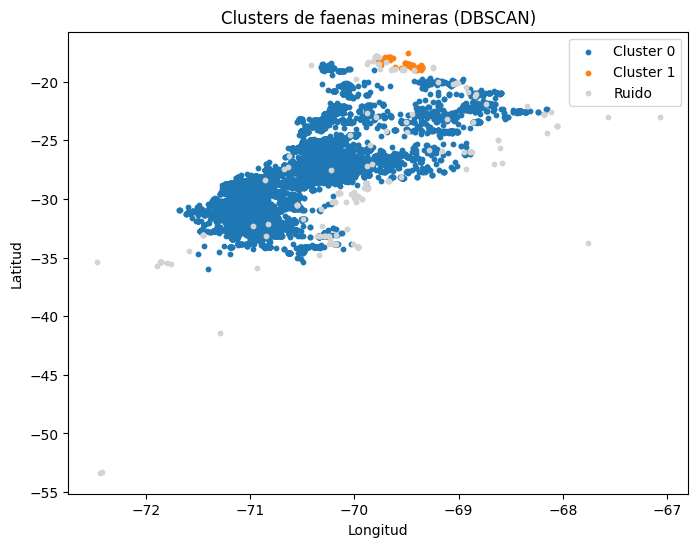

In [97]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))

# Obtener clusters únicos
clusters = df['cluster'].unique()

# Colormap
cmap = plt.get_cmap('tab10')

for cluster in clusters:
    mask = df['cluster'] == cluster
    if cluster == -1:
        # Ruido en gris
        plt.scatter(df.loc[mask, 'Longitud'], df.loc[mask, 'Latitud'],
                    color='lightgray', s=10, label='Ruido')
    else:
        plt.scatter(df.loc[mask, 'Longitud'], df.loc[mask, 'Latitud'],
                    color=cmap(cluster % 10), s=10, label=f'Cluster {cluster}')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clusters de faenas mineras (DBSCAN)')
plt.legend()
plt.show()



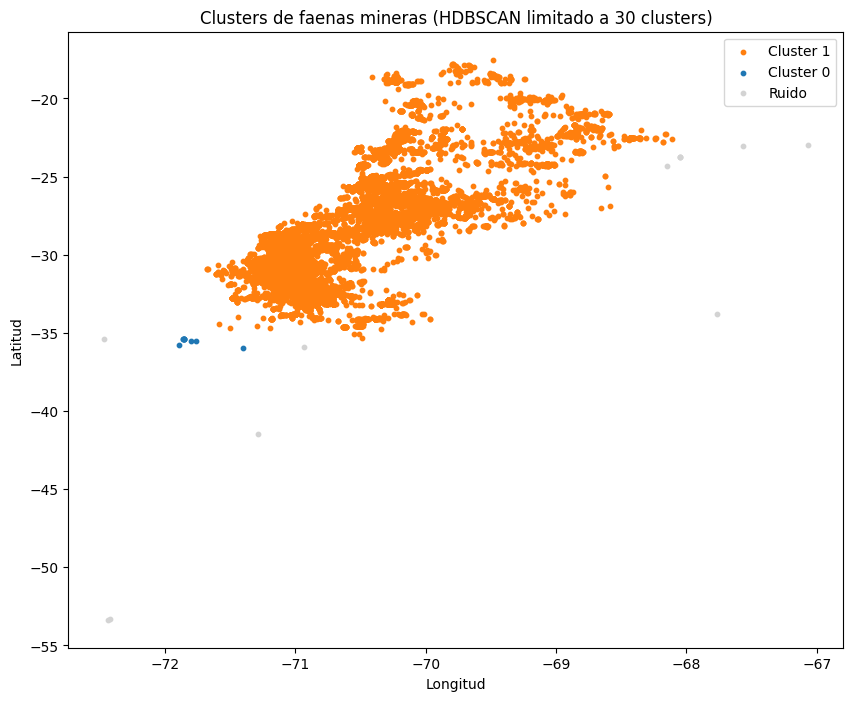

In [98]:
import hdbscan
import matplotlib.pyplot as plt

coords = df[['Longitud', 'Latitud']].to_numpy()

# HDBSCAN with parameters tuned to limit clusters
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=10,           # increase to reduce small clusters
    cluster_selection_epsilon=0.5  # increase to merge clusters
)
df['cluster'] = clusterer.fit_predict(coords)

# Keep only top 30 largest clusters, label the rest as noise (-1)
cluster_counts = df['cluster'].value_counts()
top_clusters = cluster_counts.nlargest(30).index
df['cluster'] = df['cluster'].apply(lambda x: x if x in top_clusters else -1)

# Plot
plt.figure(figsize=(10,8))
cmap = plt.get_cmap('tab10')
clusters = df['cluster'].unique()

for cluster in clusters:
    mask = df['cluster'] == cluster
    if cluster == -1:
        plt.scatter(df.loc[mask, 'Longitud'], df.loc[mask, 'Latitud'],
                    color='lightgray', s=10, label='Ruido')
    else:
        plt.scatter(df.loc[mask, 'Longitud'], df.loc[mask, 'Latitud'],
                    color=cmap(cluster % 10), s=10, label=f'Cluster {cluster}')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clusters de faenas mineras (HDBSCAN limitado a 30 clusters)')
plt.legend()
plt.show()




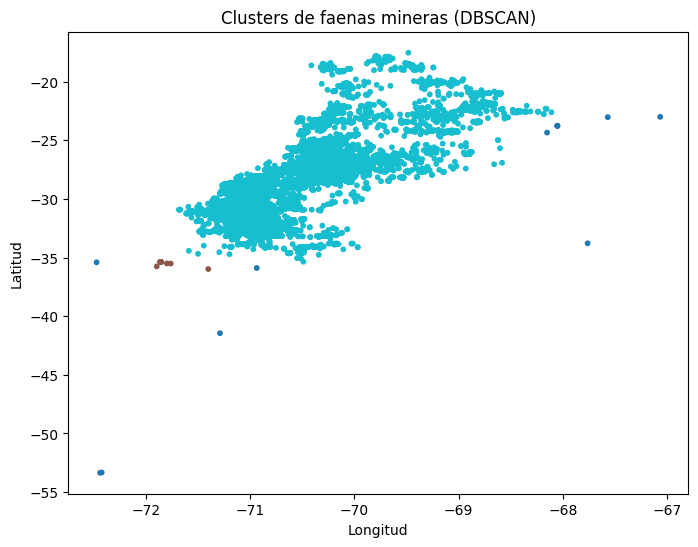

In [99]:
plt.figure(figsize=(8,6))
plt.scatter(df['Longitud'], df['Latitud'], c=df['cluster'], cmap='tab10', s=10)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Clusters de faenas mineras (DBSCAN)')
plt.show()


In [100]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
df['cluster'] = clusterer.fit_predict(df[['Longitud', 'Latitud']])


### Ciudades

In [101]:
df_sample = df.sample(frac=0.1, random_state=42).copy() 


In [102]:
from geopy.distance import geodesic
import pandas as pd
from tqdm import tqdm

# Coordinates of the 15 cities
cities_coords = {
    "Santiago": (-33.4489, -70.6693),
    "Valparaíso": (-33.0472, -71.6127),
    "Concepción": (-36.8201, -73.0444),
    "La Serena": (-29.9037, -71.2489),
    "Coquimbo": (-29.9533, -71.3395),
    "Antofagasta": (-23.6500, -70.4000),
    "Temuco": (-38.7369, -72.5904),
    "Rancagua": (-34.1708, -70.7400),
    "Iquique": (-20.2307, -70.1350),
    "Puerto Montt": (-41.4694, -72.9420),
    "Talca": (-35.4261, -71.6550),
    "Arica": (-18.4783, -70.3126),
    "Chillán": (-36.6066, -72.1034),
    "Los Ángeles": (-37.4600, -72.3500),
    "Copiapó": (-27.3668, -70.3326),
    "Valdivia": (-39.8196, -73.2459)
}

# Function to find nearest city
def nearest_city(lat, lon):
    closest_city = min(cities_coords.keys(), key=lambda city: geodesic((lat, lon), cities_coords[city]).km)
    return closest_city

# Apply to your dataframe
tqdm.pandas()
df_sample["Closest_City"] = df_sample.progress_apply(
    lambda row: nearest_city(row["Latitud"], row["Longitud"]), axis=1
)

print(df_sample.head())


 60%|█████▉    | 1264/2116 [00:03<00:02, 316.36it/s]


KeyboardInterrupt: 

In [ ]:
df_sample

,RutEmpresa,NombreEmpresa,CategoriaFaena,ProvinciaInstalacion,ComunaInstalacion,IdTipoInstalacion,TipoInstalacion,RecursoPrimarioInstalacion,Cota,Huso,IdEstado,Estado,Latitud,Longitud,cluster,Closest_City
14100,76043345-4,SCM CAMARONES,CATEGORIA D,ARICA,ARICA,8073,CANCHA DE ACOPIO,COBRE,181,19,12,ABANDONADA,-18.766115,-70.305866,28,Arica
23857,10267925-3,OMAR MUÑOZ ALVAREZ,CATEGORIA D,CHOAPA,CANELA,1291,MINA SUBTERRANEA,COBRE,1100,19,8,ACTIVA,-31.187356,-71.307579,1145,Coquimbo
26455,76828678-7,MINERA JESSICA PAMELA PEREZ SILVA EIRL,CATEGORIA D,PETORCA,CABILDO,8076,EXPLORACIÓN SUBTERRÁNEA,COBRE,475,19,8,ACTIVA,-32.413654,-70.932892,-1,Valparaíso
17161,76102677-1,MINERA HMC S.A.,CATEGORIA A,ANTOFAGASTA,MEJILLONES,1350,TALLERES Y MAESTRANZA,COBRE,765,19,8,ACTIVA,-22.676943,-70.189357,135,Antofagasta
1557,12774379-7,JULIO CESAR CONTRERAS ELGUETA,CATEGORIA D,SAN FELIPE,CATEMU,1306,PLANTA EXTRACCIÓN POR SOLVENTES,COBRE,789,19,12,ABANDONADA,-32.682402,-70.976678,868,Valparaíso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4605,76726970-6,SOCIEDAD MINERA LA ESTRELLA NORTE,CATEGORIA D,ELQUI,LA HIGUERA,1291,MINA SUBTERRANEA,COBRE,485,19,12,ABANDONADA,-29.335595,-71.109707,1049,La Serena
23484,11506964-0,SAUL CHIRINO VALENZUELA,CATEGORIA C,CHAÑARAL,DIEGO DE ALMAGRO,1337,DEPÓSITO RMM - ESTÉRILES,COBRE,1905,19,8,ACTIVA,-26.867926,-70.033074,385,Copiapó
17866,6062657-K,VICTOR SAAVEDRA NAVARRETE,SIN CATEGORIA,IQUIQUE,ALTO HOSPICIO,1292,MINA RAJO ABIERTO,COBRE,760,19,8,ACTIVA,-20.176907,-70.097185,16,Iquique
19928,8382259-7,OPIR TABITA CUEVAS SILVA,CATEGORIA D,HUASCO,FREIRINA,1349,CAMPAMENTO,COBRE,620,19,8,ACTIVA,-28.609166,-70.986205,-1,La Serena


In [ ]:
"""from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from tqdm import tqdm

# Ciudades permitidas
allowed_cities = [
    "Santiago", "Valparaíso", "Concepción", "La Serena", "Coquimbo",
    "Antofagasta", "Temuco", "Rancagua", "Iquique", "Puerto Montt",
    "Talca", "Arica", "Chillán", "Los Ángeles", "Copiapó", "Valdivia"
]

# Take a 10% random sample
df_sample = df.sample(frac=0.1, random_state=42).copy() 

# Set up Nominatim (OSM)
geolocator = Nominatim(user_agent="city_locator_sample")
reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)  # respect API limits

# Function to get nearest allowed city
def get_city(lat, lon):
    try:
        location = reverse((lat, lon), exactly_one=True)
        if location and "address" in location.raw:
            address = location.raw["address"]
            city = (
                address.get("city")
                or address.get("town")
                or address.get("village")
                or address.get("hamlet")
                or address.get("municipality")
                or address.get("county")
            )
            # Solo devolver si está en la lista permitida
            if city in allowed_cities:
                return city
        return None
    except Exception:
        return None

# Apply to sample
tqdm.pandas()
df_sample["Closest_City"] = df_sample.progress_apply(
    lambda row: get_city(row["Latitud"], row["Longitud"]), axis=1
)

# Inspect results
print(df_sample.head())
"""


'from geopy.geocoders import Nominatim\nfrom geopy.extra.rate_limiter import RateLimiter\nfrom tqdm import tqdm\n\n# Ciudades permitidas\nallowed_cities = [\n    "Santiago", "Valparaíso", "Concepción", "La Serena", "Coquimbo",\n    "Antofagasta", "Temuco", "Rancagua", "Iquique", "Puerto Montt",\n    "Talca", "Arica", "Chillán", "Los Ángeles", "Copiapó", "Valdivia"\n]\n\n# Take a 10% random sample\ndf_sample = df.sample(frac=0.1, random_state=42).copy() \n\n# Set up Nominatim (OSM)\ngeolocator = Nominatim(user_agent="city_locator_sample")\nreverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)  # respect API limits\n\n# Function to get nearest allowed city\ndef get_city(lat, lon):\n    try:\n        location = reverse((lat, lon), exactly_one=True)\n        if location and "address" in location.raw:\n            address = location.raw["address"]\n            city = (\n                address.get("city")\n                or address.get("town")\n                or address.get("vill

In [ ]:
from IPython.display import display, HTML

html = "<div style='height:300px; overflow:auto;'>" + df_sample['Closest_City'].value_counts().to_frame().to_html() + "</div>"
display(HTML(html))

,count
Closest_City,
Copiapó,613
Valparaíso,414
Coquimbo,326
Antofagasta,276
La Serena,251
Santiago,92
Iquique,57
Rancagua,47
Arica,37


In [ ]:
import requests
from tqdm import tqdm
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Get city coordinates (once per unique city)
geolocator = Nominatim(user_agent="truck_routing_demo")
reverse = RateLimiter(geolocator.geocode, min_delay_seconds=1)

def get_city_coords(city_name):
    try:
        location = geolocator.geocode(city_name + ", Chile")  # add country context
        if location:
            return location.latitude, location.longitude
    except:
        return None, None
    return None, None

# Create a mapping of city -> (lat, lon)
cities = df_sample["Closest_City"].dropna().unique()
city_coords = {}
for c in tqdm(cities, desc="Geocoding city centers"):
    lat, lon = get_city_coords(c)
    city_coords[c] = (lat, lon)

# Function to query OSRM
def get_travel_time(lat1, lon1, city):
    lat2, lon2 = city_coords.get(city, (None, None))
    if lat2 is None or lon2 is None:
        return None
    url = f"https://router.project-osrm.org/route/v1/driving/{lon1},{lat1};{lon2},{lat2}?overview=false"
    try:
        response = requests.get(url)
        data = response.json()
        if data.get("routes"):
            duration_sec = data["routes"][0]["duration"]
            return duration_sec / 60  # convert to minutes
    except Exception:
        return None
    return None

# Apply to DataFrame
tqdm.pandas()
df_sample["TravelTime_Truck_min"] = df_sample.progress_apply(
    lambda row: get_travel_time(row["Latitud"], row["Longitud"], row["Closest_City"]),
    axis=1
)

# Done!
print(df_sample[["Latitud", "Longitud", "Closest_City", "TravelTime_Truck_min"]].head())


  5%|▌         | 107/2116 [01:46<33:16,  1.01it/s]


KeyboardInterrupt: 

In [ ]:
df_sample

,RutEmpresa,NombreEmpresa,CategoriaFaena,ProvinciaInstalacion,ComunaInstalacion,IdTipoInstalacion,TipoInstalacion,RecursoPrimarioInstalacion,Cota,Huso,IdEstado,Estado,Latitud,Longitud,Closest_City,TravelTime_Truck_min
14100,76043345-4,SCM CAMARONES,CATEGORIA D,ARICA,ARICA,8073,CANCHA DE ACOPIO,COBRE,181,19,12,ABANDONADA,-18.766115,-70.305866,Arica,64.160000
23857,10267925-3,OMAR MUÑOZ ALVAREZ,CATEGORIA D,CHOAPA,CANELA,1291,MINA SUBTERRANEA,COBRE,1100,19,8,ACTIVA,-31.187356,-71.307579,Coquimbo,186.573333
26455,76828678-7,MINERA JESSICA PAMELA PEREZ SILVA EIRL,CATEGORIA D,PETORCA,CABILDO,8076,EXPLORACIÓN SUBTERRÁNEA,COBRE,475,19,8,ACTIVA,-32.413654,-70.932892,Valparaíso,140.648333
17161,76102677-1,MINERA HMC S.A.,CATEGORIA A,ANTOFAGASTA,MEJILLONES,1350,TALLERES Y MAESTRANZA,COBRE,765,19,8,ACTIVA,-22.676943,-70.189357,Antofagasta,132.145000
1557,12774379-7,JULIO CESAR CONTRERAS ELGUETA,CATEGORIA D,SAN FELIPE,CATEMU,1306,PLANTA EXTRACCIÓN POR SOLVENTES,COBRE,789,19,12,ABANDONADA,-32.682402,-70.976678,Valparaíso,116.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4605,76726970-6,SOCIEDAD MINERA LA ESTRELLA NORTE,CATEGORIA D,ELQUI,LA HIGUERA,1291,MINA SUBTERRANEA,COBRE,485,19,12,ABANDONADA,-29.335595,-71.109707,La Serena,70.813333
23484,11506964-0,SAUL CHIRINO VALENZUELA,CATEGORIA C,CHAÑARAL,DIEGO DE ALMAGRO,1337,DEPÓSITO RMM - ESTÉRILES,COBRE,1905,19,8,ACTIVA,-26.867926,-70.033074,Copiapó,120.755000
17866,6062657-K,VICTOR SAAVEDRA NAVARRETE,SIN CATEGORIA,IQUIQUE,ALTO HOSPICIO,1292,MINA RAJO ABIERTO,COBRE,760,19,8,ACTIVA,-20.176907,-70.097185,Iquique,43.596667
19928,8382259-7,OPIR TABITA CUEVAS SILVA,CATEGORIA D,HUASCO,FREIRINA,1349,CAMPAMENTO,COBRE,620,19,8,ACTIVA,-28.609166,-70.986205,La Serena,213.218333


In [ ]:
df = pd.read_csv("data/df_sample.csv")

In [ ]:
df

,RutEmpresa,NombreEmpresa,CategoriaFaena,ProvinciaInstalacion,ComunaInstalacion,IdTipoInstalacion,TipoInstalacion,RecursoPrimarioInstalacion,Cota,Huso,IdEstado,Estado,Latitud,Longitud,Closest_City,TravelTime_Truck_min
0,76043345-4,SCM CAMARONES,CATEGORIA D,ARICA,ARICA,8073,CANCHA DE ACOPIO,COBRE,181,19,12,ABANDONADA,-18.766115,-70.305866,Arica,64.160000
1,10267925-3,OMAR MUÑOZ ALVAREZ,CATEGORIA D,CHOAPA,CANELA,1291,MINA SUBTERRANEA,COBRE,1100,19,8,ACTIVA,-31.187356,-71.307579,Canela,84.291667
2,76828678-7,MINERA JESSICA PAMELA PEREZ SILVA EIRL,CATEGORIA D,PETORCA,CABILDO,8076,EXPLORACIÓN SUBTERRÁNEA,COBRE,475,19,8,ACTIVA,-32.413654,-70.932892,Cabildo,28.773333
3,76102677-1,MINERA HMC S.A.,CATEGORIA A,ANTOFAGASTA,MEJILLONES,1350,TALLERES Y MAESTRANZA,COBRE,765,19,8,ACTIVA,-22.676943,-70.189357,Mejillones,84.641667
4,12774379-7,JULIO CESAR CONTRERAS ELGUETA,CATEGORIA D,SAN FELIPE,CATEMU,1306,PLANTA EXTRACCIÓN POR SOLVENTES,COBRE,789,19,12,ABANDONADA,-32.682402,-70.976678,Catemu,34.590000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,76726970-6,SOCIEDAD MINERA LA ESTRELLA NORTE,CATEGORIA D,ELQUI,LA HIGUERA,1291,MINA SUBTERRANEA,COBRE,485,19,12,ABANDONADA,-29.335595,-71.109707,La Higuera,24.631667
2112,11506964-0,SAUL CHIRINO VALENZUELA,CATEGORIA C,CHAÑARAL,DIEGO DE ALMAGRO,1337,DEPÓSITO RMM - ESTÉRILES,COBRE,1905,19,8,ACTIVA,-26.867926,-70.033074,Copiapó,120.755000
2113,6062657-K,VICTOR SAAVEDRA NAVARRETE,SIN CATEGORIA,IQUIQUE,ALTO HOSPICIO,1292,MINA RAJO ABIERTO,COBRE,760,19,8,ACTIVA,-20.176907,-70.097185,Alto Hospicio,32.471667
2114,8382259-7,OPIR TABITA CUEVAS SILVA,CATEGORIA D,HUASCO,FREIRINA,1349,CAMPAMENTO,COBRE,620,19,8,ACTIVA,-28.609166,-70.986205,Freirina,54.183333


In [ ]:
desalinadoras = pd.read_excel("data/DESALINADORAS.xlsx")

In [ ]:
import osmnx as ox
import pandas as pd

ports = [
    "ANTOFAGASTA", "ARICA", "COQUIMBO", "CORONEL", "IQUIQUE", "LIRQUEN",
    "MEJILLON", "PUERTO CHACABUCO", "PUERTO MONTT", "PUNTA ARENAS",
    "SAN ANTONIO", "SAN VICENTE", "TALCAHUANO", "VALPARAISO"
]

port_data = []

for port in ports:
    try:
        gdf = ox.geocode_to_gdf(f"{port}, Chile")
        for _, row in gdf.iterrows():
            # Get centroid for Polygon/MultiPolygon
            centroid = row.geometry.centroid
            port_data.append({
                "port": port,
                "latitude": centroid.y,
                "longitude": centroid.x
            })
    except Exception as e:
        print(f"Could not find {port}: {e}")

df_ports = pd.DataFrame(port_data)
print(df_ports)



Could not find LIRQUEN: Nominatim did not geocode query 'LIRQUEN, Chile' to a geometry of type (Multi)Polygon.
Could not find MEJILLON: Nominatim geocoder returned 0 results for query 'MEJILLON, Chile'.
Could not find PUERTO CHACABUCO: Nominatim did not geocode query 'PUERTO CHACABUCO, Chile' to a geometry of type (Multi)Polygon.
            port   latitude  longitude
0    ANTOFAGASTA -24.279614 -69.404129
1          ARICA -18.530349 -69.973201
2       COQUIMBO -30.618861 -70.860603
3        CORONEL -37.007138 -73.126331
4        IQUIQUE -20.924960 -70.048028
5   PUERTO MONTT -41.514880 -72.813920
6   PUNTA ARENAS -53.685975 -72.212604
7    SAN ANTONIO -33.667028 -71.486745
8    SAN VICENTE -34.477442 -71.123224
9     TALCAHUANO -36.715775 -73.099609
10    VALPARAISO -33.010620 -71.720327


In [ ]:
from bs4 import BeautifulSoup

# Replace this with your HTML content
html_content = """
$.each(resp.cports,function(p,port){$('#plist').append('<li class="col-xs-6 col-md-3"><a title="more info" target="_blank" href="'+g_lang+'/port/'+port.ckey+'">'+port.name+'</a></li>');var content='<div><b>'+port.name+'</b>'+'<br><a target="_blank" href="'+g_lang+'/port/'+port.ckey+'">more info<span class="img_link"></span></a>'+'</div>';map.drawMarker('marker-tr-'+(port.t?'3':'4')+'.png',[parseFloat(port.lng),parseFloat(port.lat)],content);});map.fitMap();if(resp.ckey!==0&&typeof(window.history.pushState)=='function'){window.history.pushState('j',"Title",g_lang+"/maritime/"+resp.ckey);}}});});if(countryCode!=0)$('#country-content').val(countryCode).change();});/*]]>*/</script> <div style="height: 600px"> <div id="section_map"> <div id="map_canvas"></div> <div id="page-content"> <div class="country-content-wrapper"> <select id="country-content"> <option value="0">- Select country -</option> <option value="AF">Afghanistan</option><option value="AL">Albania</option><option value="DZ">Algeria</option><option value="AS">American Samoa</option><option value="AO">Angola</option><option value="AG">Antigua and Barbuda</option><option value="AR">Argentina</option><option value="AW">Aruba</option><option value="AU">Australia</option><option value="AT">Austria</option><option value="AZ">Azerbaijan</option><option value="BS">Bahamas</option><option value="BH">Bahrain</option><option value="BD">Bangladesh</option><option value="BB">Barbados</option><option value="BY">Belarus</option><option value="BE">Belgium</option><option value="BZ">Belize</option><option value="BJ">Benin</option><option value="BM">Bermuda</option><option value="BO">Bolivia</option><option value="BA">Bosnia and Herzegovina</option><option value="BW">Botswana</option><option value="BR">Brazil</option><option value="VG">British Virgin Islands</option><option value="BN">Brunei</option><option value="BG">Bulgaria</option><option value="KH">Cambodia</option><option value="CM">Cameroon</option><option value="CA">Canada</option><option value="CV">Cape Verde</option><option value="KY">Cayman Islands</option><option value="CL">Chile</option><option value="CN">China</option><option value="CX">Christmas Island</option><option value="CO">Colombia</option><option value="KM">Comoros</option><option value="CK">Cook Islands</option><option value="CR">Costa Rica</option><option value="HR">Croatia</option><option value="CU">Cuba</option><option value="CW">Curacao</option><option value="CY">Cyprus</option><option value="CZ">Czech Republic</option><option value="CD">Democratic Republic of the Congo</option><option value="DK">Denmark</option><option value="DJ">Djibouti</option><option value="DM">Dominica</option><option value="DO">Dominican Republic</option><option value="EC">Ecuador</option><option value="EG">Egypt</option><option value="SV">El Salvador</option><option value="GQ">Equatorial Guinea</option><option value="ER">Eritrea</option><option value="EE">Estonia</option><option value="FK">Falkland Islands</option><option value="FO">Faroe Islands</option><option value="FJ">Fiji</option><option value="FI">Finland</option><option value="FR">France</option><option value="GF">French Guiana</option><option value="PF">French Polynesia</option><option value="GA">Gabon</option><option value="GM">Gambia</option><option value="GE">Georgia</option><option value="DE">Germany</option><option value="GH">Ghana</option><option value="GI">Gibraltar</option><option value="GR">Greece</option><option value="GL">Greenland</option><option value="GD">Grenada</option><option value="GP">Guadeloupe</option><option value="GU">Guam</option><option value="GT">Guatemala</option><option value="GN">Guinea</option><option value="GW">Guinea-Bissau</option><option value="GY">Guyana</option><option value="HT">Haiti</option><option value="HN">Honduras</option><option value="HK">Hong Kong</option><option value="HU">Hungary</option><option value="IS">Iceland</option><option value="IN">India</option><option value="ID">Indonesia</option><option value="IR">Iran</option><option value="IQ">Iraq</option><option value="IE">Ireland</option><option value="IM">Isle of Man</option><option value="IL">Israel</option><option value="IT">Italy</option><option value="CI">Ivory Coast</option><option value="JM">Jamaica</option><option value="JP">Japan</option><option value="JO">Jordan</option><option value="KZ">Kazakhstan</option><option value="KE">Kenya</option><option value="KI">Kiribati</option><option value="KW">Kuwait</option><option value="KG">Kyrgyzstan</option><option value="LV">Latvia</option><option value="LB">Lebanon</option><option value="LR">Liberia</option><option value="LY">Libya</option><option value="LT">Lithuania</option><option value="MO">Macao</option><option value="MK">Macedonia</option><option value="MG">Madagascar</option><option value="MW">Malawi</option><option value="MY">Malaysia</option><option value="MV">Maldives</option><option value="ML">Mali</option><option value="MT">Malta</option><option value="MH">Marshall Islands</option><option value="MQ">Martinique</option><option value="MR">Mauritania</option><option value="MU">Mauritius</option><option value="YT">Mayotte</option><option value="MX">Mexico</option><option value="FM">Micronesia</option><option value="MD">Moldova</option><option value="MC">Monaco</option><option value="ME">Montenegro</option><option value="MS">Montserrat</option><option value="MA">Morocco</option><option value="MZ">Mozambique</option><option value="MM">Myanmar</option><option value="NA">Namibia</option><option value="NR">Nauru</option><option value="NL">Netherlands</option><option value="AN">Netherlands Antilles</option><option value="NC">New Caledonia</option><option value="NZ">New Zealand</option><option value="NI">Nicaragua</option><option value="NG">Nigeria</option><option value="NU">Niue</option><option value="NF">Norfolk Island</option><option value="MP">Northern Mariana Islands</option><option value="KP">North Korea</option><option value="NO">Norway</option><option value="OM">Oman</option><option value="PK">Pakistan</option><option value="PA">Panama</option><option value="PG">Papua New Guinea</option><option value="PY">Paraguay</option><option value="PE">Peru</option><option value="PH">Philippines</option><option value="PL">Poland</option><option value="PT">Portugal</option><option value="PR">Puerto Rico</option><option value="QA">Qatar</option><option value="CG">Republic of the Congo</option><option value="RE">Reunion</option><option value="RO">Romania</option><option value="RU">Russia</option><option value="BL">Saint Barthelemy</option><option value="SH">Saint Helena</option><option value="KN">Saint Kitts and Nevis</option><option value="LC">Saint Lucia</option><option value="PM">Saint Pierre and Miquelon</option><option value="VC">Saint Vincent and the Grenadines</option><option value="WS">Samoa</option><option value="ST">Sao Tome and Principe</option><option value="SA">Saudi Arabia</option><option value="SN">Senegal</option><option value="RS">Serbia</option><option value="SC">Seychelles</option><option value="SL">Sierra Leone</option><option value="SG">Singapore</option><option value="SX">Sint Maarten</option><option value="SK">Slovakia</option><option value="SI">Slovenia</option><option value="SB">Solomon Islands</option><option value="SO">Somali</option><option value="S0">Somaliland</option><option value="ZA">South Africa</option><option value="GS">South Georgia and the South Sandwich Islands</option><option value="KR">South Korea</option><option value="ES">Spain</option><option value="LK">Sri Lanka</option><option value="SD">Sudan</option><option value="SR">Suriname</option><option value="SE">Sweden</option><option value="CH">Switzerland</option><option value="SY">Syria</option><option value="TW">Taiwan</option><option value="TJ">Tajikistan</option><option value="TZ">Tanzania</option><option value="TH">Thailand</option><option value="TG">Togo</option><option value="TO">Tonga</option><option value="TT">Trinidad and Tobago</option><option value="TN">Tunisia</option><option value="TR">Turkey</option><option value="TM">Turkmenistan</option><option value="TC">Turks and Caicos Islands</option><option value="TV">Tuvalu</option><option value="UA">Ukraine</option><option value="AE">United Arab Emirates</option><option value="GB">United Kingdom</option><option value="US">United States</option><option value="UM">United States Minor Outlying Islands</option><option value="UY">Uruguay</option><option value="VI">U.S. Virgin Islands</option><option value="UZ">Uzbekistan</option><option value="VU">Vanuatu</option><option value="VE">Venezuela</option><option value="VN">Vietnam</option><option value="YE">Yemen</option><option value="ZM">Zambia</option><option value="ZW">Zimbabwe</option> </select> <div class="country-content__label"><img src="/design/images/markers/marker-tr-4.png" style="width: 20px;height: 20px;"> - <span>Sea / River port</span></div> <div class="country-content__label"><img src="/design/images/markers/marker-tr-3.png" style="width: 20px;height: 20px;"> - <span>Container terminal</span></div> </div> <a href='/shipping/request/' class="requestAQuote-btn">Request A Quote</a> </div> <div class="w-c__result"> <div>loading</div> </div> </div> </div> <div class="container filter_controls"> <div class="row"> <h1 class="page-heading" data-type="sea-ports-title">Chile&nbsp;Ports</h1> <div class="container-list"> <ul id="plist" class="ports clearfix"> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/ancud_cl">Ancud</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/antofagasta_cl">Antofagasta</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/arica_cl">Arica</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/balmaceda_cl">Balmaceda</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/barquito_cl">Barquito</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/cabo_negro_cl">Cabo Negro</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/caldera_cl">Caldera</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/calderilla_cl">Calderilla</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/caleta_barquito_cl">Caleta Barquito</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/caleta_coloso_cl">Caleta Coloso</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/caleta_patillos_cl">Caleta Patillos</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/castro_cl">Castro</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/chacabuco_cl">Chacabuco</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/coquimbo_cl">Coquimbo</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/coronel_cl">Coronel</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/corral_cl">Corral</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/cruz_grande_cl">Cruz Grande</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/easter_island_cl">Easter Island</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/guayacan_cl">Guayacan</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/huasco_cl">Huasco</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/iquique_cl">Iquique</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/isla_de_pascua_cl">Isla de Pascua</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/isla_guarello_cl">Isla Guarello</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/la_chimba_cove_cl">La Chimba Cove</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/la_serena_cl">La Serena</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/lirquen_cl">Lirquen</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/lota_cl">Lota</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/magellan_strait_area_cl">Magellan Strait Area</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/mejillones_cl">Mejillones</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/patillos_cove_cl">Patillos Cove</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/penco_cl">Penco</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/port_williams_cl">Port Williams</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/puerto_angamos_cl">Puerto Angamos</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/puerto_chacabuco_cl">Puerto Chacabuco</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/puerto_montt_cl">Puerto Montt</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/puerto_natales_cl">Puerto Natales</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/puerto_ventanas_cl">Puerto Ventanas</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/punta_arenas_cl">Punta Arenas</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/punta_patache_cl">Punta Patache</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/quellon_cl">Quellon</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/quemchi_cl">Quemchi</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/quintero_cl">Quintero</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/san_antonio_cl">San Antonio</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/santiago_cl">Santiago</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/san_vicente_cl">San Vicente</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/talcahuano_cl">Talcahuano</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/taltal_cl">Taltal</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/tocopilla_cl">Tocopilla</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/valdivia_cl">Valdivia</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/port/valparaiso_cl">Valparaiso</a> </li> </ul> </div> <h2 class="section-title" data-type="near-ports-title">Sea Ports Near Chile</h2> <div id="countries" class="container-list"> <ul id="countries-list" class="ports clearfix"> <li class="col-xs-6 col-md-3"> <a title="more info" href="/maritime/argentina">Argentina</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/maritime/bolivia">Bolivia</a> </li> <li class="col-xs-6 col-md-3"> <a title="more info" href="/maritime/peru">Peru</a> </li> </ul> </div> </div> </div> <div class="landing-wrapper"> <div class="conatiner"> <section class="sea-port-main-section"> <div class="sea-port-main-section__wrapper"> <h1 class="sea-port-main-section__wrapper__title">World<img class="anchor" src="/design/images/maritime/anchorImage.png" alt="">Sea Ports <img class="lines" src="/design/images/maritime/linesImage.png" alt="linesImage"></h1> <p class="sea-port-main-section__wrapper__subtitle">World Sea Ports is a shipping industry terminal data software that gives an opportunity to access <b>information about any port with just a few clicks.</b> It makes logistics solutions faster and more convenient. Use this product on our website and get the ability to instantly receive <b>real-time data about ports & terminals.</b> Just find the port on the map or select it from the list, make one click and find out everything you need. You can use World Sea Ports on our website or choose Web/API integration.</p> <button type="button" class="sea-port-main-section__wrapper__try-now cu_open-form" data-message="Hello, I'm interested in World Sea Ports tool.">Try now</button> </div> </section> <section class="about-world-ports-section"> <div class="about-world-ports-section__wrapper"> <h2 class="about-world-ports-section__wrapper__title">Information about world ports that can be accessed</h2> <ul class="about-world-ports-section__wrapper__list-wrapper-items"> <li class="item">Overview of port facilities</li> <li class="item">Contact information</li> <li class="item">Number of berths</li> <li class="item">Coastline length</li> <li class="item purple-item">Port depth</li> <li class="item">Terminal Types</li> <li class="item">Cargo categories that the port handles</li> <li class="item">Complete list of port services</li> <li class="item purple-item">Details regarding dry bulk and wet bulk terminals</li> <li class="item">And more</li> </ul> </div> </section> <section class="customer-experience-section"> <div class="customer-experience-section__wrapper"> <div class="customer-experience-section__wrapper__content"> <h2 class="customer-experience-section__wrapper__content__title">Enrich your customer experience</h2> <p class="customer-experience-section__wrapper__content__subtitle">Port performance monitoring <b>helps avoid unforeseen situations during transportation, delays, and enables quick selection of the optimal port for delivery.</b> Compare different destinations and choose the one that will bring the most benefit to the business. You can use the world seaports map as a white-label web integration.</p> <button type="button" class="customer-experience-section__wrapper__content__port-integrate cu_open-form" data-message="Hello, I'm interested in World Sea Ports tool.">Integrate World Sea Ports <svg class="c-arrow arrow-right" viewBox="0 0 10 10" aria-hidden="true"> <path class="c-arrow__line" d="M1 5h7"/> <path class="c-arrow__tip" d="M2 1l4 4-4 4"/> </svg> </button> </div> <div class="customer-experience-section__wrapper__image-block"> <picture> <source srcset="/design/images/maritime/your-customer-experience-pcImage.png" media="(min-width: 1200px)"/> <source srcset="/design/images/maritime/your-customer-experience-tabletImage.png" media="(min-width: 768px)"/> <source srcset="/design/images/maritime/your-customer-experience-phone375Image.png" media="(min-width: 375px)"/> <img src="/design/images/maritime/your-customer-experience-phoneImage.png" alt="api-parcel-tacking-image"/> </picture> </div> </div> </section> <section class="sea-ports-advantages-section"> <div class="sea-ports-advantages-section__wrapper"> <div class="sea-ports-advantages-section__wrapper__integration-benefits"> <h2 class="sea-ports-advantages-section__wrapper__integration-benefits__title">Advantages of World Sea Ports as a web integration</h2> <a class="sea-ports-advantages-section__wrapper__integration-benefits__start-now" target="_blank" href="https://docs.searates.com/guides/integrations/world-sea-ports">Start now</a> </div> <div class="sea-ports-advantages-section__wrapper__advantages-section"> <div class="sea-ports-advantages-section__wrapper__advantages-section__first-block"> <picture> <source srcset="/design/images/maritime/advantages-world-sea-ports-pcImage.png" media="(min-width: 1200px)"/> <source srcset="/design/images/maritime/advantages-world-sea-ports-tabletImage.png" media="(min-width: 768px)"/> <source srcset="/design/images/maritime/advantages-world-sea-ports-phone375Image.png" media="(min-width: 375px)"/> <img src="/design/images/maritime/advantages-world-sea-ports-phoneImage.png" alt="world-sea-ports-image"/> </picture> <div class="sea-ports-advantages-section__wrapper__advantages-section__first-block__wrapper-items"> <div class="sea-ports-advantages-section__wrapper__advantages-section__first-block__wrapper-items__advantage-all-information"> <img src="/design/images/maritime/all-informationIcon.svg" alt="all-information-icon"> <h2 class="sea-ports-advantages-section__wrapper__advantages-section__first-block__wrapper-items__advantage-all-information__title">All information in one place</h2> <p class="sea-ports-advantages-section__wrapper__advantages-section__first-block__wrapper-items__advantage-all-information__subtitle">With this maritime logistics software, clients don’t have to piece together data from across the internet. All the necessary information can be obtained through <b>a single widget,</b> taking just a few minutes.</p> </div> <div class="sea-ports-advantages-section__wrapper__advantages-section__first-block__wrapper-items__advantage-usability"> <img src="/design/images/maritime/great-usabilityIcon.svg" alt="great-usability-icon"> <h2 class="sea-ports-advantages-section__wrapper__advantages-section__first-block__wrapper-items__advantage-usability__title">User-friendly interface, great usability</h2> <p class="sea-ports-advantages-section__wrapper__advantages-section__first-block__wrapper-items__advantage-usability__subtitle">Even if the user is not very tech-savvy, they won’t encounter any issues. They just need to <b>select a country,</b> see its location on the map, choose a port, and access the most detailed information about it. Nothing more!</p> </div> <div class="sea-ports-advantages-section__wrapper__advantages-section__first-block__wrapper-items__for-pc"> <img src="/design/images/maritime/up-to-date-informationIcon.svg" alt="up-to-date-information-icon"> <h2 class="sea-ports-advantages-section__wrapper__advantages-section__first-block__wrapper-items__for-pc__title">Up-to-date information</h2> <p class="sea-ports-advantages-section__wrapper__advantages-section__first-block__wrapper-items__for-pc__subtitle">Data about <b>worldwide shipping ports and worldwide shipping terminals</b> is updated in real time.</p> </div> <div class="sea-ports-advantages-section__wrapper__advantages-section__first-block__wrapper-items__for-pc"> <img src="/design/images/maritime/autonomyIcon.svg" alt="autonomy-icon"> <h2 class="sea-ports-advantages-section__wrapper__advantages-section__first-block__wrapper-items__for-pc__title">Autonomy</h2> <p class="sea-ports-advantages-section__wrapper__advantages-section__first-block__wrapper-items__for-pc__subtitle">The program <b> operates independently</b> without requiring maintenance. Data updates automatically. All you need to do is agree on the integration, and that’s it.</p> </div> </div> </div> <div class="sea-ports-advantages-section__wrapper__advantages-section__second-block"> <div class="sea-ports-advantages-section__wrapper__advantages-section__second-block__advantage-up-to-date"> <img src="/design/images/maritime/up-to-date-informationIcon.svg" alt="up-to-date-information-icon"> <h2 class="sea-ports-advantages-section__wrapper__advantages-section__second-block__advantage-up-to-date__title">Up-to-date information</h2> <p class="sea-ports-advantages-section__wrapper__advantages-section__second-block__advantage-up-to-date__subtitle">Data about <b>worldwide shipping ports and worldwide shipping terminals</b> is updated in real time.</p> </div> <div class="sea-ports-advantages-section__wrapper__advantages-section__second-block__advantage-autonomy"> <img src="/design/images/maritime/autonomyIcon.svg" alt="autonomy-icon"> <h2 class="sea-ports-advantages-section__wrapper__advantages-section__second-block__advantage-autonomy__title">Autonomy</h2> <p class="sea-ports-advantages-section__wrapper__advantages-section__second-block__advantage-autonomy__subtitle">The program <b> operates independently</b> without requiring maintenance. Data updates automatically. All you need to do is agree on the integration, and that’s it.</p> </div> <div class="sea-ports-advantages-section__wrapper__advantages-section__second-block__advantage-logistics-optimization"> <img src="/design/images/maritime/logistics-optimizationIcon.svg" alt="logistics-optimization-icon"> <h2 class="sea-ports-advantages-section__wrapper__advantages-section__second-block__advantage-logistics-optimization__title">Logistics optimization</h2> <p class="sea-ports-advantages-section__wrapper__advantages-section__second-block__advantage-logistics-optimization__subtitle">What used to be handled by logistics specialists can now be done by modern software. The widget provides <b>an intuitive seaport map of the world,</b> allowing clients to easily compare and choose the best way to deliver cargo from point A to point B.</p> </div> <div class="sea-ports-advantages-section__wrapper__advantages-section__second-block__advantage-cost-effectiveness"> <img src="/design/images/maritime/cost-effectivenessIcon.svg" alt="cost-effectiveness-icon"> <h2 class="sea-ports-advantages-section__wrapper__advantages-section__second-block__advantage-cost-effectiveness__title">Cost-effectiveness</h2> <p class="sea-ports-advantages-section__wrapper__advantages-section__second-block__advantage-cost-effectiveness__subtitle">You don’t need to invest time and money in developing your own software. Everything is ready! <b>Simply integrate World Sea Ports software</b> and immediately take advantage of all its benefits.</p> </div> </div> </div> </div> </section> <section class="section-maritime-database-section"> <div class="section-maritime-database-section__wrapper"> <div class="section-maritime-database-section__wrapper__image-block"> <picture> <source srcset="/design/images/maritime/filter-pcImage.png" media="(min-width: 1200px)"/> <source srcset="/design/images/maritime/filter-tabletImage.png" media="(min-width: 768px)"/> <source srcset="/design/images/maritime/filter-phone375Image.png" media="(min-width: 375px)"/> <img src="/design/images/maritime/filter-phoneImage.png" alt="filter-image"/> </picture> </div> <div class="section-maritime-database-section__wrapper__description-blocks"> <div class="section-maritime-database-section__wrapper__description-blocks__next-one-block"> <h2 class="section-maritime-database-section__wrapper__description-blocks__next-one-block__title">Be the next one! <img class="arrow-title" src="/design/images/maritime/top-arrowImage.png" alt="top-arrowImage"></h2> <p class="section-maritime-database-section__wrapper__description-blocks__next-one-block__subtitle"><b>A global database of real-time port data worldwide</b> is at your service! Millions of clients around the globe are already using this digital port management platform and reaping invaluable benefits for their business. Be the next one!</p> <a class="section-maritime-database-section__wrapper__description-blocks__next-one-block__start-now" target="_blank" href="https://docs.searates.com/guides/integrations/world-sea-ports">Start now</a> </div> <div class="section-maritime-database-section__wrapper__description-blocks__your-capabilities-block"> <img class="section-maritime-database-section__wrapper__description-blocks__your-capabilities-block__company-logo" src="/design/images/maritime/your-companyImage.png" alt="your-companyImage"> <p class="section-maritime-database-section__wrapper__description-blocks__your-capabilities-block__subtitle">You can use this software not only as a web product. You have the option to <b>integrate it as an API on your website.</b></p> <button type="button" class="section-maritime-database-section__wrapper__description-blocks__your-capabilities-block__learn-more cu_open-form" data-message="Hello, I'm interested in World Sea Ports tool.">Learn more <svg class="c-arrow arrow-right" viewBox="0 0 10 10" aria-hidden="true"> <path class="c-arrow__line" d="M1 5h7"/> <path class="c-arrow__tip" d="M2 1l4 4-4 4"/> </svg> </button> </div> </div> </div> </section> <section class="online-software-section"> <div class="online-software-section__wrapper"> <h2 class="online-software-section__wrapper__title">Ultimate online <br class="br-mini-phone"/> software compatibility</h2> <p class="online-software-section__wrapper__description">Choose how you want to use this sea port locator: as a web product or as an API for your website. Want to get detailed information about the advantages of both options? We are ready to <br class="br-pc"/> provide it to you.</p> <div class="online-software-section__wrapper__wrapper-consultation-arrow"> <img class="online-software-section__wrapper__wrapper-consultation-arrow__arrow" src="/design/images/integrations/api-parcel-tracking/arrow.png" alt="arrow-image"> <button type="button" class="online-software-section__wrapper__wrapper-consultation-arrow__consultation cu_open-form" data-message="Hello, I'm interested in World Sea Ports tool.">Get a consultation</button> </div> </div> </section> </div> </div> <div data-contact='{"platform":"searates","modal":true,"small":true,"smallFull":true,"lang":""}' id="contact-app"></div> </div> <div id="inbox_root" data-mode="mini" style="position: fixed; z-index: 3;"></div> <footer class="footer"> <div class="container-no-bt"> <div class="footer__header"> <a href="/" class="footer__logo"> <img src="/design/images/footer/searates-logo.svg" alt="searates logo"> <div class="footer__logo-text"> <span>2025 © SeaRates.</span> <span>All rights reserved.</span> </div> </a> <div class="footer__header-wrapper"> <div class="footer__social"> <a class="footer__social-item" href="https://www.linkedin.com/company/searates/" target="_blank noopener noreferrer"> <svg width="16" height="16" viewBox="0 0 16 16" fill="none" xmlns="http://www.w3.org/2000/svg"> <path d="M15.8632 15.8631H12.6071V10.755C12.6071 9.53686 12.5854 7.96881 10.9136 7.96881C9.21767 7.96881 8.95818 9.29592 8.95818 10.6663V15.8627H5.70215V5.35832H8.82794V6.79383H8.87178C9.50823 5.70373 10.696 5.05022 11.9559 5.09709C15.2561 5.09709 15.8646 7.27158 15.8646 10.1006L15.8632 15.8631Z" fill="#000C37"/> <path d="M2.02961 3.92239C2.02942 3.92239 2.02932 3.92239 2.02922 3.92239C0.992629 3.92239 0.139648 3.06801 0.139648 2.0296C0.139648 0.991195 0.992629 0.136719 2.02922 0.136719C3.06571 0.136719 3.9186 0.990998 3.91879 2.02921C3.91879 2.02931 3.91879 2.02941 3.91879 2.0296C3.91879 3.06781 3.06601 3.92229 2.02961 3.92239Z" fill="#000C37"/> <path d="M3.65693 15.8637H0.397461V5.35889H3.65693V15.8637Z"/> </svg> </a> <a class="footer__social-item" href="https://www.facebook.com/searates/" target="_blank noopener noreferrer"> <svg xmlns="http://www.w3.org/2000/svg" width="22" height="22" viewBox="0 0 22 22" fill="none"> <path d="M21.1558 11.0619C21.1558 5.41904 16.6097 0.845215 11.0007 0.845215C5.39177 0.845215 0.845703 5.41904 0.845703 11.0619C0.845703 16.1624 4.55838 20.3889 9.41384 21.1553V14.0156H6.83582V11.0612H9.41384V8.81082C9.41384 6.2504 10.9297 4.83547 13.2497 4.83547C14.36 4.83547 15.5231 5.03518 15.5231 5.03518V7.54957H14.2415C12.9803 7.54957 12.5876 8.3376 12.5876 9.14594V11.0619H15.404L14.9538 14.0149H12.5876V21.1553C17.4431 20.3889 21.1558 16.1624 21.1558 11.0619Z"/> </svg> </a> <a class="footer__social-item instagram" href="https://www.instagram.com/searatesllc/" target="_blank noopener noreferrer"> <svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 30 30" width="25" height="25"><path d="M 9.9980469 3 C 6.1390469 3 3 6.1419531 3 10.001953 L 3 20.001953 C 3 23.860953 6.1419531 27 10.001953 27 L 20.001953 27 C 23.860953 27 27 23.858047 27 19.998047 L 27 9.9980469 C 27 6.1390469 23.858047 3 19.998047 3 L 9.9980469 3 z M 22 7 C 22.552 7 23 7.448 23 8 C 23 8.552 22.552 9 22 9 C 21.448 9 21 8.552 21 8 C 21 7.448 21.448 7 22 7 z M 15 9 C 18.309 9 21 11.691 21 15 C 21 18.309 18.309 21 15 21 C 11.691 21 9 18.309 9 15 C 9 11.691 11.691 9 15 9 z M 15 11 A 4 4 0 0 0 11 15 A 4 4 0 0 0 15 19 A 4 4 0 0 0 19 15 A 4 4 0 0 0 15 11 z"/></svg> </a> <a class="footer__social-item" href="https://t.me/searatesfeed" target="_blank noopener noreferrer"> <svg width="19" height="16" viewBox="0 0 19 16" fill="none" xmlns="http://www.w3.org/2000/svg"> <path d="M2.03957 6.96457C7.48301 4.62067 14.5268 1.76301 15.4994 1.36741C18.0498 0.332278 18.8325 0.530462 18.4423 2.82329C18.162 4.47127 17.3536 9.92665 16.7088 13.3225C16.3265 15.3363 15.4683 15.5749 14.1195 14.7036C13.4708 14.2844 10.1962 12.1646 9.48516 11.6669C8.83647 11.2133 7.94169 10.6676 9.06386 9.59279C9.46336 9.21015 12.0807 6.76334 14.1203 4.85925C14.3874 4.60923 14.0517 4.19838 13.7433 4.39885C10.9944 6.18327 7.18319 8.65981 6.69803 8.98223C5.96523 9.46931 5.26124 9.69265 3.99811 9.33744C3.04337 9.06913 2.11121 8.74899 1.74831 8.62703C0.350464 8.15749 0.682211 7.54921 2.03957 6.96457Z" fill="#000C37"/> </svg> </a> <a class="footer__social-item" href="https://www.youtube.com/channel/UC-riN9Wesr6jbxi1DUTjFJQ" target="_blank noopener noreferrer"> <svg xmlns="http://www.w3.org/2000/svg" width="20" height="12" viewBox="0 0 20 12" fill="none"> <path fill-rule="evenodd" clip-rule="evenodd" d="M17.1688 0.799381C17.9597 0.981992 18.5813 1.51482 18.7914 2.19023C19.1737 3.41598 19.1737 5.97504 19.1737 5.97505C19.1737 5.97505 19.1737 5.97505 19.1737 5.97505C19.1737 5.97506 19.1737 8.53412 18.7914 9.75987C18.5783 10.4378 17.9567 10.9706 17.1688 11.1507C15.7388 11.4784 10.0014 11.4784 10.0014 11.4784C10.0014 11.4784 4.26689 11.4784 2.83399 11.1507C2.04312 10.9681 1.42152 10.4353 1.2114 9.75987C0.829102 8.53412 0.829102 5.97505 0.829102 5.97505C0.829102 5.97505 0.829102 3.41598 1.2114 2.19023C1.42444 1.51232 2.04604 0.979491 2.83399 0.799381C4.26689 0.47168 10.0014 0.47168 10.0014 0.47168C10.0014 0.47168 15.7388 0.47168 17.1688 0.799381ZM12.104 5.56404C12.4442 5.73244 12.4442 6.21766 12.104 6.38607L8.83075 8.00628C8.52593 8.15717 8.16869 7.93539 8.16869 7.59527V4.35484C8.16869 4.01472 8.52593 3.79294 8.83075 3.94382L12.104 5.56404Z" fill="#000C37"/> </svg> </a> <a class="footer__social-item" href="https://x.com/wwwsearatescom" target="_blank noopener noreferrer"> <svg xmlns="http://www.w3.org/2000/svg" width="16" height="16" viewBox="0 0 16 16" fill="none"> <g clip-path="url(#clip0_13923_45983)"> <path d="M12.1619 1.5H14.3682L9.54941 7.00625L15.2182 14.5H10.7807L7.30254 9.95625L3.32754 14.5H1.11816L6.27129 8.60938L0.836914 1.5H5.38691L8.52754 5.65312L12.1619 1.5ZM11.3869 13.1812H12.6088L4.72129 2.75H3.40879L11.3869 13.1812Z" fill="#000C37"/> </g> <defs> <clipPath id="clip0_13923_45983"> <rect width="16" height="16" fill="white" transform="translate(-0.000976562)"/> </clipPath> </defs> </svg> </a> </div> <div class="footer__links"> <a href="https://apps.apple.com/ua/app/searates/id6446767405?l=uk" target="_blank"> <img src="/design/images/footer/appStore.svg" alt="app store" class="app-store-icon" loading="lazy" width="90" height="32"> </a> <a href="https://play.google.com/store/apps/details?id=com.searates.searatesMobile" target="_blank"> <img src="/design/images/footer/googlePlay.svg" alt="google play" class="google-play-icon" loading="lazy" width="90" height="32"> </a> </div> </div> </div> <div class="footer__nav"> <div class="footer__column"> <div class="footer__title">Tools</div> <div class="footer__list"> <a class="footer__item" href="/logistics-explorer/">Logistics Explorer</a> <a class="footer__item" href="/container/tracking/">Container Tracking</a> <a class="footer__item" href="/air/tracking/">Air Tracking</a> <a class="footer__item" href="/schedules/">Ship Schedules</a> <a class="footer__item" href="/logistics-map/">Logistics Map</a> <a class="footer__item" href="/distance-time">Distance and Time</a> <a class="footer__item" href="/load-calculator/">Load Calculator</a> <a class="footer__item" href="/freight-index/">Freight Index</a> <a class="footer__item" href="/route-planner/">Route Planner</a> <a class="footer__item" href="/carbon-emissions-calculator/">CO2 Calculator</a> <a class="footer__item" href="/erp/">Corporate Products</a> </div> </div> <div class="footer__column"> <div class="footer__title">Opportunities</div> <div class="footer__list"> <a class="footer__item" href="/shipping/for-shippers/">For Shippers</a> <a class="footer__item" href="/shipping/for-carriers/">For Carriers</a> <a class="footer__item" href="/integrations">Integrations</a> <a class="footer__item" href="/tools/">Find a tool</a> <a class="footer__item" href="https://docs.searates.com/">Developer Portal</a> <a class="footer__item" href="/services/request-it-quote/">Request an IT tool</a> <a class="footer__item" href="/affiliate-program/">Affiliates</a> </div> </div> <div class="footer__column"> <div class="footer__title">Resources</div> <div class="footer__list"> <a class="footer__item" href="/freight-routes/">Find Freight Routes</a> <a class="footer__item" href="/sealine/">Shipping Lines Directory</a> <a class="footer__item" href="/maritime">Maritime</a> </div> </div> <div class="footer__column"> <div class="footer__title">Legal</div> <div class="footer__list"> <a class="footer__item" href="/tos/">Terms of service</a> <a class="footer__item" href="/privacy/">Privacy Policy</a> <a class="footer__item" href="/about/searates-copyright/">Copyright</a> <a class="footer__item" href="/reference/documents-templates-and-forms/">Documents templates</a> </div> </div> <div class="footer__column"> <div class="footer__title">Company</div> <div class="footer__list"> <a class="footer__item" href="/contact/">Contact us</a> <a class="footer__item" href="/blog/">Blog</a> <a class="footer__item" href="/contact/careers/">Careers</a> <a class="footer__item" href="/contact/shippers-help/">Help</a> <a class="footer__item" href="tel:+15122549712">+1 512 254 9712</a> </div> </div> </div> <p class="footer__button-lang" data-toggle="modal" data-target="#langModal"> <span class="footer__icon-lang"><img src="/design/images/flags/4x3/en.svg" alt="lang-icon" loading="lazy" width="16" height="10"></span> <span class="footer__text-lang">English</span> </p> <div class="footer__description"> Founded in August of 2005, SeaRates is a trusted community marketplace for people to send goods around the world. SeaRates.com helps to arrange the international cargo delivery from 1m³ or 50 kg till shiploads. Thanks to world-class customer service and a growing community of cargo agents, SeaRates.com is the easiest way for people to ship their goods overseas, or to offer free space in the container, truck or vessel to millions of consignors. </div> <div class="footer__breadcrumbs breadcrumbs" itemscope itemtype="https://schema.org/BreadcrumbList"> <div class="breadcrumbs__item" itemprop="itemListElement" itemscope itemtype="https://schema.org/ListItem"> <a class="breadcrumbs__item-text breadcrumbs__item-text_link" itemprop="item" href="/"> <span itemprop="name">SeaRates.com</span> </a> <meta itemprop="position" content="1"/> </div> <div class="breadcrumbs__item" itemprop="itemListElement" itemscope itemtype="https://schema.org/ListItem"> <a class="breadcrumbs__item-text breadcrumbs__item-text_link" itemprop="item" href="/maritime"> <span itemprop="name">Maritime</span> </a> <meta itemprop="position" content="2"/> </div> <div class="breadcrumbs__item" itemprop="itemListElement" itemscope itemtype="https://schema.org/ListItem"> <span class="breadcrumbs__item-text" itemprop="name">chile shipping ports</span> <meta itemprop="position" content="3"/> </div> </div></div> </footer> <div class="langModal | modal" id="langModal" tabindex="-1" role="dialog" aria-hidden="true"> <div class="langModal__wrapper"> <div class="langModal__container | container-no-bt"> <div class="langModal__header"> <img class="langModal__logo" src="/design/images/searates-logo.svg" width="130" height="31" alt="logo SeaRates"> <button class="langModal__button-close" type="button" data-dismiss="modal" aria-label="Close"> <i class="far fa-times"></i> </button> </div> <div class="langModal__body"> <h3 class="langModal__title">Choose language:</h3> <div class="langModal__items"> <a class="langModal__item langModal__item_active" href="/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-en"></i> <span class="langModal__text">English</span> </a> <a class="langModal__item " href="/ru/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-ru"></i> <span class="langModal__text">Pусский</span> </a> <a class="langModal__item " href="/ua/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-ua"></i> <span class="langModal__text">Українська</span> </a> <a class="langModal__item " href="/de/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-de"></i> <span class="langModal__text">Deutsch</span> </a> <a class="langModal__item " href="/es/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-es"></i> <span class="langModal__text">Español</span> </a> <a class="langModal__item " href="/cn/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-cn"></i> <span class="langModal__text">中文</span> </a> <a class="langModal__item " href="/fr/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-fr"></i> <span class="langModal__text">Français</span> </a> <a class="langModal__item " href="/ar/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-sa"></i> <span class="langModal__text">عربي</span> </a> <a class="langModal__item " href="/tr/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-tr"></i> <span class="langModal__text">Türkçe</span> </a> <a class="langModal__item " href="/it/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-it"></i> <span class="langModal__text">Italiano</span> </a> <a class="langModal__item " href="/th/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-th"></i> <span class="langModal__text">ไทย</span> </a> <a class="langModal__item " href="/ge/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-ge"></i> <span class="langModal__text">ქართული</span> </a> <a class="langModal__item " href="/ir/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-ir"></i> <span class="langModal__text">فارسی</span> </a> <a class="langModal__item " href="/kr/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-kr"></i> <span class="langModal__text">한국어</span> </a> <a class="langModal__item " href="/jp/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-jp"></i> <span class="langModal__text">日本語</span> </a> <a class="langModal__item " href="/il/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-il"></i> <span class="langModal__text">עברית</span> </a> <a class="langModal__item " href="/gr/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-gr"></i> <span class="langModal__text">Ελληνικά</span> </a> <a class="langModal__item " href="/pl/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-pl"></i> <span class="langModal__text">Polski</span> </a> <a class="langModal__item " href="/vi/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-vn"></i> <span class="langModal__text">Người việt nam</span> </a> <a class="langModal__item " href="/pt/maritime/chile"> <i class="langModal__icon | flag-icon flag-icon-pt"></i> <span class="langModal__text">Português</span> </a> </div> </div> </div> </div> <script>/*<![CDATA[*/function onClose(event){const closeIcon=event.target.closest('#report-ticket-close-icon');const closeButton=event.target.closest('#report-ticket-close-button');if(closeIcon||closeButton){document.getElementById('report-ticket-popup-container').innerHTML='';}}/*]]>*/</script> </div> <script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.eu01.nr-data.net","licenseKey":"NRJS-d09638e32ad52292ab2","applicationID":"388362697","transactionName":"MhBSZQoZVxdVV01dXQtaZUMRV1AKUFFBGkINBQ==","queueTime":0,"applicationTime":224,"atts":"HldRE0IDRBk=","errorBeacon":"bam.eu01.nr-data.net","agent":""}</script></body> </html>
"""

soup = BeautifulSoup(html_content, "html.parser")

# Extract all port links and names
ports = []
base_url = "https://www.searates.com"
for a_tag in soup.find_all("a", title="more info"):
    port_name = a_tag.text.strip()
    port_link = base_url + a_tag['href']
    ports.append({"name": port_name, "url": port_link})

# Print results
for port in ports:
    print(port)


{'name': "'+port.name+'", 'url': "https://www.searates.com'+g_lang+'/port/'+port.ckey+'"}
{'name': 'Ancud', 'url': 'https://www.searates.com/port/ancud_cl'}
{'name': 'Antofagasta', 'url': 'https://www.searates.com/port/antofagasta_cl'}
{'name': 'Arica', 'url': 'https://www.searates.com/port/arica_cl'}
{'name': 'Balmaceda', 'url': 'https://www.searates.com/port/balmaceda_cl'}
{'name': 'Barquito', 'url': 'https://www.searates.com/port/barquito_cl'}
{'name': 'Cabo Negro', 'url': 'https://www.searates.com/port/cabo_negro_cl'}
{'name': 'Caldera', 'url': 'https://www.searates.com/port/caldera_cl'}
{'name': 'Calderilla', 'url': 'https://www.searates.com/port/calderilla_cl'}
{'name': 'Caleta Barquito', 'url': 'https://www.searates.com/port/caleta_barquito_cl'}
{'name': 'Caleta Coloso', 'url': 'https://www.searates.com/port/caleta_coloso_cl'}
{'name': 'Caleta Patillos', 'url': 'https://www.searates.com/port/caleta_patillos_cl'}
{'name': 'Castro', 'url': 'https://www.searates.com/port/castro_cl'